#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
practice0 = pd.DataFrame({"이름": ["홍길동", "김길동"], "나이": [100, 200]})

In [6]:
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [11]:
practice = pd.DataFrame({"날짜":[], "운동":[], "양":[]}) #데이터 프레임에 칼럼명 넣기

In [12]:
practice

,날짜,운동,양


In [13]:
practice.loc[0] = ['19-3-1', '달리기', 1.]  #loc: location 인덱스 0번 위치에 해당 값 넣기

In [14]:
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [15]:
# loc[행 인덱스 => 행 인덱스에 한 행을 추가해라!
practice.loc[0] = ['19-3-1', '달리기', 1.]

In [16]:
practice.loc[1] = ['19-3-2', '걷기', 1.]
practice.loc[2] = ['19-3-2', '달리기', 1.]
practice.loc[3] = ['19-3-2', '계단오르기', 1.]

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0


In [17]:
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0


In [18]:
practice.loc[4] = ['19-3-3', '걷기', 1.5]
practice.loc[5] = ['19-3-3', '달리기', 1.]

In [19]:
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [5]:
practice2 = pd.read_csv('../practice.csv', encoding='utf-8')
practice2

,Unnamed: 0,날짜,운동,양
0,0,19-3-1,달리기,1.0
1,1,19-3-2,걷기,1.0
2,2,19-3-2,달리기,1.0
3,3,19-3-2,계단오르기,1.0
4,4,19-3-3,걷기,1.5
5,5,19-3-3,달리기,1.0


In [20]:
# practice.to_csv('../data09/pratice2.csv', encoding='utf-8')
# kaggle에서는 write가 안됨!

In [22]:
practice2.loc[6] = ['19-3-4', '걷기', 1.5]
practice2.loc[7] = ['19-3-5', '달리기', 1.]
practice2.loc[8] = ['19-3-6', '걷기', 2.5]
practice2.loc[9] = ['19-3-6', '달리기', 0.5]
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [21]:
practice2 = pd.read_csv('../practice.csv', index_col=0, encoding='utf-8')
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [24]:
practice2.pivot_table(index='운동', aggfunc=[np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [22]:
# pivot: 요악이라는 뜻
practice2.pivot_table(index='운동') #avg기준!

,양
운동,
걷기,1.25
계단오르기,1.00
달리기,1.00


In [26]:
#NaN: 행과 열에 적합한 값이 없다 => 삭제, 수치로 변환
#수치변환: 평균, 0, 기본값으로 변환

In [23]:
prac_pivot = practice2.pivot('날짜', '운동', '양')
#                   인덱스(행), 종류(열), 테이블가운데 채워지는 값
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0


In [12]:
type(prac_pivot)

pandas.core.frame.DataFrame

In [24]:
prac_pivot.fillna(0, inplace=True) #비파괴함수(원본을 건들지 않음) => 파괴함수(변경된 부분 원본에 반영시킴.)
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0


In [19]:
not_excercise.drop(columns='기간', inplace=True)

In [25]:
not_excercise = pd.read_excel('../reason_not_exercise.xls')
not_excercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [22]:
not_excercise.drop(index=range(22, 53), inplace=True)

In [26]:
not_excercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [25]:
not_excercise.shape #shape: 행열의 크기

(22, 7)

In [27]:
not_excercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [28]:
not_excercise['대분류'] == '성별'  #브로드캐스팅

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [28]:
not_excercise['대분류']  #대괄호[컬럼명], 컬럼명을 추출할 수 있음

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
22    혼인상태별
23    지역대분류
24    지역대분류
25    지역대분류
26    지역대분류
27    지역대분류
28      종로구
29       중구
30      용산구
31      성동구
32      광진구
33     동대문구
34      중랑구
35      성북구
36      강북구
37      도봉구
38      노원구
39      은평구
40     서대문구
41      마포구
42      양천구
43      강서구
44      구로구
45      금천구
46     영등포구
47      동작구
48      관악구
49      서초구
50      강남구
51      송파구
52      강동구
Name: 대분류, dtype: object

In [31]:
not_excercise[not_excercise['대분류'] == '성별']

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [29]:
#not_excercise[]  #조건을 넣기위한 []역할

In [34]:
not_ex_sex.drop(columns='대분류', inplace=True)

In [30]:
not_ex_sex = not_excercise[not_excercise['대분류'] == '성별'].copy()  #copy 깊은복사
not_ex_sex

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [36]:
not_ex_sex.set_index('분류', inplace=True)

In [31]:
not_ex_sex

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [42]:
import matplotlib.pyplot as plt

In [43]:
not_ex_sex

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [44]:
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)

In [45]:
from matplotlib import font_manager, rc  #한글처리

In [46]:
def call():
    return 100, 200

In [47]:
print(call())

(100, 200)


In [48]:
plt.rcParams['axes.unicode_minus'] = False

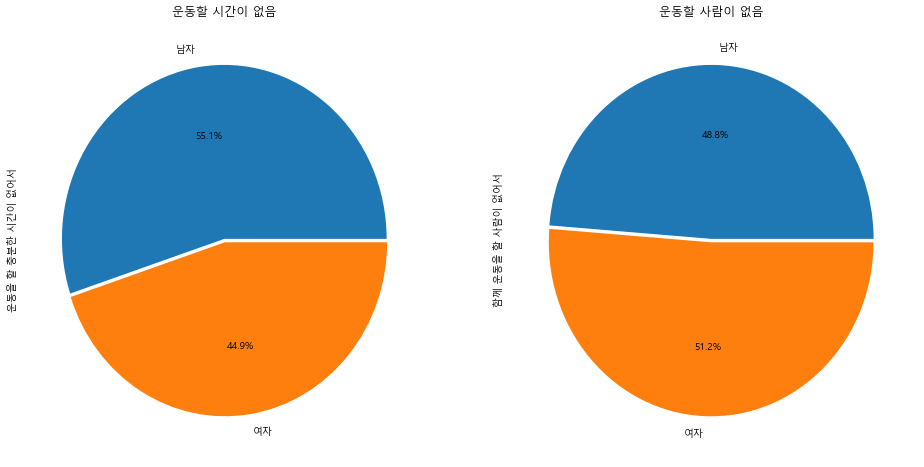

In [49]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))  #1행 2열 만듦
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%1.1f%%')
not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
ax[1].set_title('운동할 사람이 없음')
plt.show()

In [49]:
x, y = call()

In [50]:
print(x, y)

100 200


In [51]:
not_ex_age = not_excercise[not_excercise['대분류'] == '연령별'].copy()

In [52]:
not_ex_age

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [53]:
not_ex_age.drop(columns='대분류', inplace=True)

In [54]:
not_ex_age.set_index('분류', inplace=True)

In [55]:
not_ex_age

,기간,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,,
10대,2017,55.7,6.1,5.6,32.2,0.3
20대,2017,54.8,6.9,5.2,32.9,0.1
30대,2017,58.1,5.5,4.6,31.6,0.2
40대,2017,57.7,6.8,5.2,29.4,1
50대,2017,50.1,9.2,7.2,32.2,1.4
60대 이상,2017,27.5,12.8,6.9,46.8,6


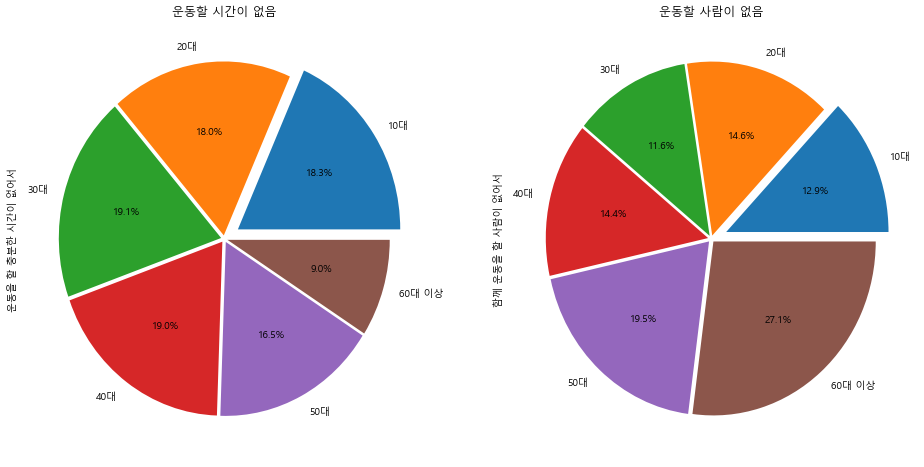

In [61]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))  #1행 2열 만듦
not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0.1, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[0], autopct='%1.1f%%')
not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0.1, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
ax[1].set_title('운동할 사람이 없음')
plt.show()